# <center> Image Thresholding

In OpenCV two types of thresholding are applied : Basic threholding and Adaptive thresholding

*First is basic thresholding where for every pixel, the same threshold value is applied. If the pixel value is higher than the threshold, it is set to a maximum value, otherwise it is set to 0. The function <b> cv2.threshold </b>is used to apply the thresholding. The first argument is the source image, which should be a grayscale image. The second argument is the threshold value which is used to classify the pixel values. The third argument is the maximum value which is assigned to pixel values exceeding the threshold.

The different types of thresholding provided by OpenCV are:
* cv.THRESH_BINARY
* cv.THRESH_BINARY_INV
* cv.THRESH_TRUNC
* cv.THRESH_TOZERO
* cv.THRESH_TOZERO_INV

This is passed as the fourth argument to the cv2.threhold function 

In adaptive thresholding the algorithm determines the threshold for a pixel based on a small region around it. 


In [1]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

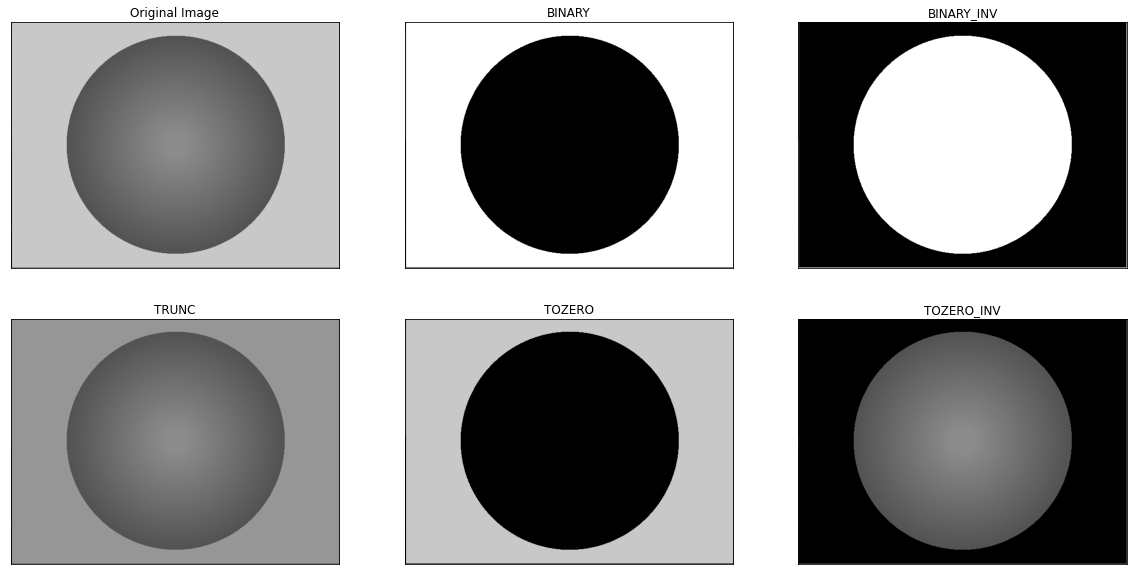

In [2]:
img = cv2.imread(os.path.join('images','grad.png'),0)
plt.subplots(2,3,figsize=(20,10))
ret,thresh1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY) # basic thresholding. Here pixel value= 255 if greater than 150 else 0
ret,thresh2 = cv2.threshold(img,150,255,cv2.THRESH_BINARY_INV) # pixel value= 255 if less than 150 else 0
ret,thresh3 = cv2.threshold(img,150,255,cv2.THRESH_TRUNC) # If pixel intensity value is greater than threshold, 
                                                        #it is truncated to the threshold. All other values remain same.
ret,thresh4 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO) # above the threshold remains same. Rest are set to zero
ret,thresh5 = cv2.threshold(img,150,255,cv2.THRESH_TOZERO_INV)# below the threshold remains same. Rest are set to zero
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i],cmap='gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

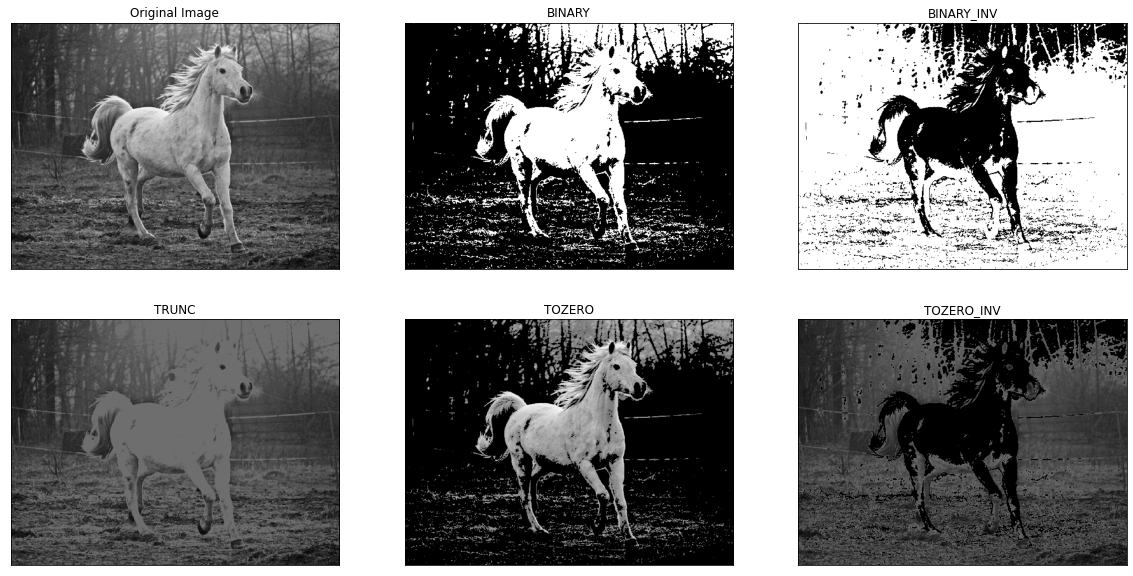

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
image_path=os.path.join('images','Dreaming_about_a_horse.jpg')
img = cv2.imread(image_path,0)
plt.subplots(2,3,figsize=(20,10))
ret,thresh1 = cv2.threshold(img,110,255,cv2.THRESH_BINARY) # basic thresholding pixel value= 255 above 110
ret,thresh2 = cv2.threshold(img,110,255,cv2.THRESH_BINARY_INV) # pixel value= 255 below 110
ret,thresh3 = cv2.threshold(img,110,255,cv2.THRESH_TRUNC) # pixel value remains= 110 above 110
ret,thresh4 = cv2.threshold(img,110,255,cv2.THRESH_TOZERO) 
ret,thresh5 = cv2.threshold(img,110,255,cv2.THRESH_TOZERO_INV)
titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

# Adaptive Thresholding

If an image has different lighting conditions in different areas. In that case, adaptive thresholding can help. Here, the algorithm determines the threshold for a pixel based on a small region around it. So we get different thresholds for different regions of the same image which gives better results for images with varying illumination.



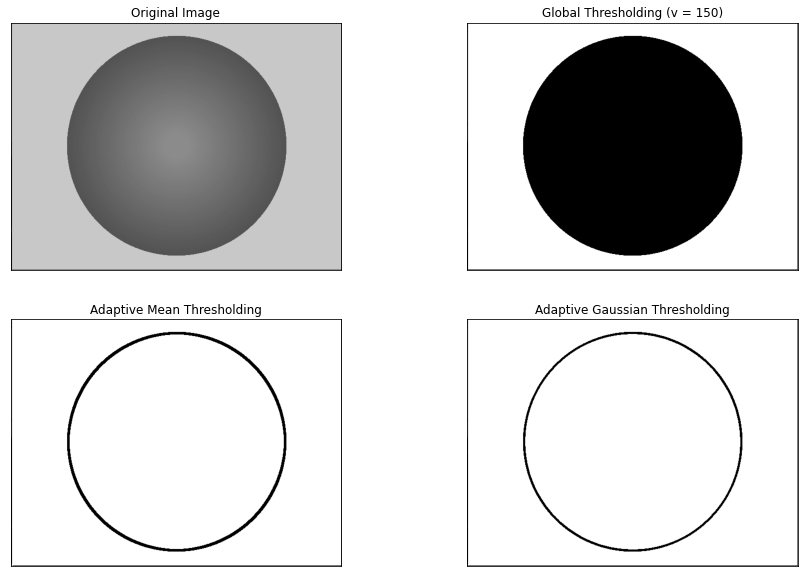

In [4]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread(os.path.join('images','grad.png'),0)
ret,th1 = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 150)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
plt.subplots(2,2,figsize=(15,10))
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

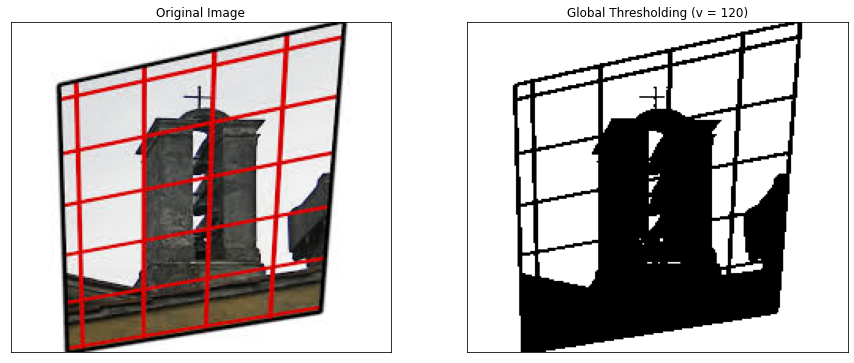

In [5]:
import cv2
import matplotlib.pyplot as plt
image_path=os.path.join('images','perspective.jpeg')
img=cv2.imread(image_path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
re1,th1=cv2.threshold(img_gray,120,255,cv2.THRESH_BINARY)
titles = ['Original Image', 'Global Thresholding (v = 120)']
images = [img, th1]
plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

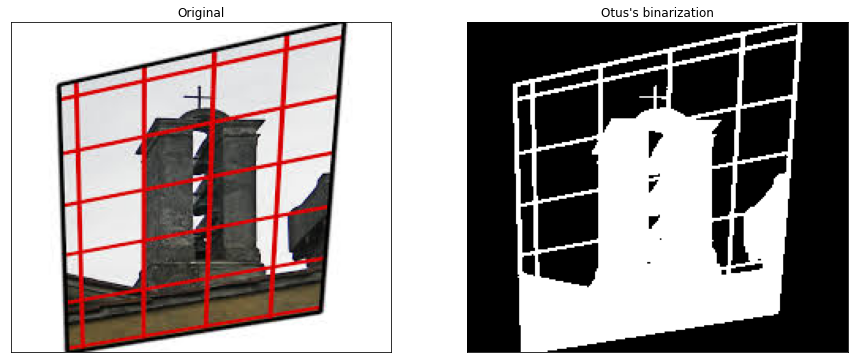

In [6]:
import cv2
import matplotlib.pyplot as plt
image_path=os.path.join('images','perspective.jpeg')
img=cv2.imread(image_path)
rgb_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray_image = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, result = cv2.threshold(gray_image,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
titles=['Original', 'Otus\'s binarization']
images=[rgb_image,result]
plt.subplots(1,2,figsize=(15,10))
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.title(titles[i])
    plt.imshow(images[i],'gray')
    plt.xticks([]),plt.yticks([])
plt.show()
 

## Adaptive Thresholding on HSV image on the Hue channel

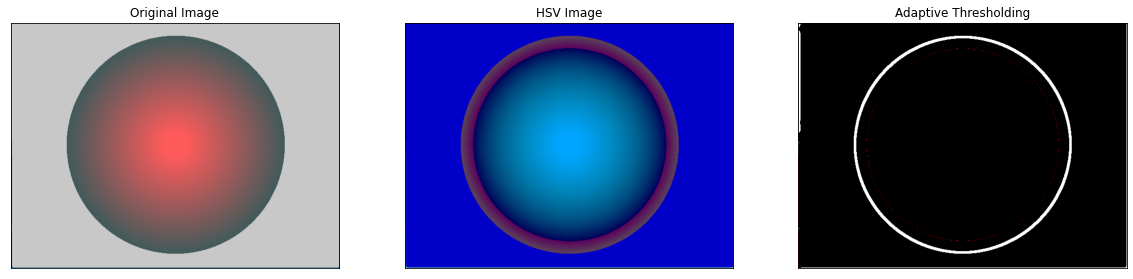

In [7]:
image_path=os.path.join('images','grad.png')
imag=cv2.imread(image_path)
imag=cv2.medianBlur(imag,5)
img=cv2.cvtColor(imag,cv2.COLOR_BGR2HSV)
[H,S,V]=cv2.split(img)
images=[H,S,V]
titles = ['Original Image', 'HSV Image','Adaptive Thresholding']
plt.subplots(1,3,figsize=(20,10))
th1=[]  
#H=cv2.adaptiveThreshold(H,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)
V=cv2.adaptiveThreshold(V,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)
S=cv2.adaptiveThreshold(S,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,11,2)
th=cv2.merge([H,S,V])
th=cv2.cvtColor(th,cv2.COLOR_HSV2RGB)
images1 = [cv2.cvtColor(imag,cv2.COLOR_BGR2RGB),img, th]
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images1[i],vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

# <center> Thank You